<br>

# Milestone1_4. Exploratory Data Analysis

Identify and engineer influential Features

## Team #30

<br>

## 4.3. Restaurant Ratings by Cuisine

#### insights

Japanese cuisine generally receives higher ratings compared to the other three cuisines, with the highest mean and median stars among all categories. On the contrary, Chinese cuisine has the lowest average ratings among the four, with a statistically significant difference observed.

<br>


In [24]:
master4.groupby('cuisine').stars.mean().sort_values()

cuisine
Chinese     3.343501
Italian     3.505867
Mexican     3.511181
Japanese    3.761137
Name: stars, dtype: float64

In [25]:
master4.groupby('cuisine')['stars'].median().sort_values()

cuisine
Chinese     3.5
Italian     3.5
Mexican     3.5
Japanese    4.0
Name: stars, dtype: float64

In [26]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(
    master4['stars'][master4['cuisine'] == 'Chinese'],
    master4['stars'][master4['cuisine'] == 'Japanese'],
    master4['stars'][master4['cuisine'] == 'Italian'],
    master4['stars'][master4['cuisine'] == 'Mexican']
)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("There is a statistically significant difference in average ratings among the cuisines.")
else:
    print("There is no statistically significant difference in average ratings among the cuisines.")


F-statistic: 69.2793149191495
P-value: 2.0610420104320917e-44
There is a statistically significant difference in average ratings among the cuisines.


In [27]:
# We perform post hoc tests following an ANOVA to compare 
# pairwise differences in average ratings among the four cuisines. 
# One commonly used post hoc test is the Tukey-Kramer test. 
# This test will help us determine which specific pairs of cuisines 
# have statistically significant differences in their average ratings.

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(
    master4['stars'][master4['cuisine'] == 'Chinese'],
    master4['stars'][master4['cuisine'] == 'Japanese'],
    master4['stars'][master4['cuisine'] == 'Italian'],
    master4['stars'][master4['cuisine'] == 'Mexican']
)

# Perform Tukey-Kramer post hoc test
tukey_results = pairwise_tukeyhsd(master4['stars'], master4['cuisine'], alpha=0.05)

# Print the Tukey-Kramer results
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
 Chinese  Italian   0.1624    0.0 0.1099  0.2148   True
 Chinese Japanese   0.4176    0.0 0.3424  0.4928   True
 Chinese  Mexican   0.1677    0.0 0.1156  0.2198   True
 Italian Japanese   0.2553    0.0 0.1859  0.3246   True
 Italian  Mexican   0.0053 0.9891 -0.038  0.0486  False
Japanese  Mexican    -0.25    0.0 -0.319 -0.1809   True
-------------------------------------------------------


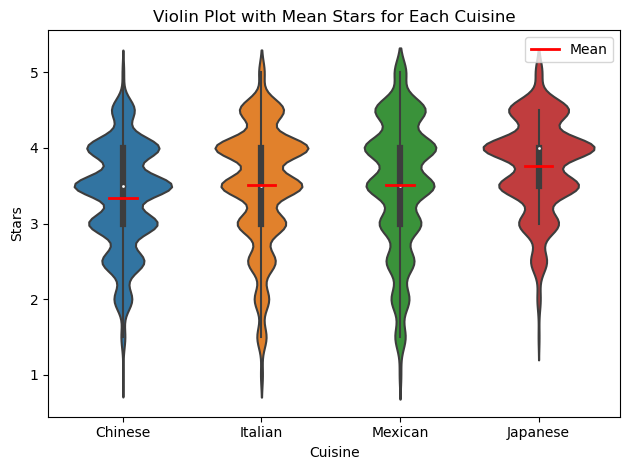

In [28]:
# Calculate mean stars for each cuisine
mean_stars = master4.groupby('cuisine')['stars'].mean().sort_values()

# Cuisine order 
cuisineOrder = master4.groupby('cuisine').stars.mean().sort_values().index.tolist()

# Create a violin plot
sns.violinplot(x='cuisine', y='stars', data=master4, order=cuisineOrder)

   
# Plot mean stars as short lines
for i, cuisine in enumerate(mean_stars.index):
    plt.plot([i - 0.1, i + 0.1], [mean_stars[cuisine], mean_stars[cuisine]], 
             color='red', linewidth=2, zorder=3, label='Mean' if i == 0 else "")


plt.legend()
plt.xlabel('Cuisine')
plt.ylabel('Stars')
plt.title('Violin Plot with Mean Stars for Each Cuisine')
plt.xticks(ticks=range(len(mean_stars.index)), labels=mean_stars.index)
plt.tight_layout()
plt.show()


<br>

## 4.4. Examine Relationships Between Stars and Numerical Variables

### 4.4.1. Correlation Matrix

#### insights

Upon examining the correlation matrix and heatmap, we observed a strong correlation between restaurant ratings and review sentiment, tip sentiment, as well as associated features related to reviews and tips. In contrast, there is almost no correlation between restaurant ratings and demographic factors such as education, ethnicity, age, income, population density, etc.

Additionally, we observed significant correlations between certain features. For instance, the useful review count and cool review count exhibit a high positive correlation, and similarly, the review count and cool review count also display a strong positive correlation. Moreover, the percentage of Hispanic Latino population is negatively correlated with the percentage of bachelor's degree.

It is not surprising that restaurant ratings correlate strongly with review sentiment, tip sentiment, review count, and associated features. After all, the rating serves as a reflection of the overall customer sentiment and the restaurant's popularity. However, the lack of correlation with demographic factors was unexpected.

<br>

In [29]:
correlation_matrix = master4[['stars'] + numerical_vars].corr()

corr_order = correlation_matrix.abs().sort_values(by='stars', ascending=False).index.tolist()
correlation_matrix = correlation_matrix.sort_values(by='stars', ascending=False)[corr_order]
correlation_matrix

,stars,review_sentiment_score,tip_sentiment_score,cool_review_count,useful_review_count,review_count,tip_count,funny_review_count,ctgy_count,education_pcnt,hispanic_latino_pcnt,bachelors_pcnt,household_cnt,household_perRestaurant,population_perRestaurant,asian_pcnt,avg_tip_compliment,median_age,median_household_income,white_pcnt
stars,1.000000,0.836599,0.326402,0.216546,0.185717,0.175694,0.155739,0.125708,0.078273,0.046246,0.037845,0.037020,-0.031107,-0.021153,-0.020454,0.020155,-0.019360,-0.004898,0.003697,0.002492
review_sentiment_score,0.836599,1.000000,0.310836,0.204683,0.192749,0.180372,0.168935,0.137107,0.029353,0.068781,0.001812,0.090948,-0.049486,-0.037418,-0.037300,0.046164,-0.001857,0.001279,0.032793,0.038254
tip_sentiment_score,0.326402,0.310836,1.000000,0.118354,0.125535,0.132007,0.126845,0.086478,0.042468,0.033549,-0.015131,0.024609,-0.025324,-0.003204,-0.003631,-0.029898,-0.023885,0.061384,0.043097,0.064613
cool_review_count,0.216546,0.204683,0.118354,1.000000,0.918731,0.896107,0.824232,0.921110,0.227301,0.072714,0.055689,0.108535,-0.036869,-0.059779,-0.058084,0.107391,0.029394,-0.087243,-0.018677,-0.033783
useful_review_count,0.185717,0.192749,0.125535,0.918731,1.000000,0.889395,0.821745,0.891684,0.223208,0.084316,0.028188,0.127813,-0.042999,-0.062656,-0.061531,0.113702,0.035830,-0.065048,0.001048,-0.013865
review_count,0.175694,0.180372,0.132007,0.896107,0.889395,1.000000,0.909416,0.870785,0.224051,0.091492,0.015899,0.152421,-0.048754,-0.062508,-0.060908,0.099364,0.021233,-0.061831,0.012289,0.003305
tip_count,0.155739,0.168935,0.126845,0.824232,0.821745,0.909416,1.000000,0.814187,0.185594,0.059723,0.034428,0.105763,-0.028169,-0.048641,-0.047454,0.074963,0.027036,-0.061716,-0.017546,-0.015322
funny_review_count,0.125708,0.137107,0.086478,0.921110,0.891684,0.870785,0.814187,1.000000,0.195106,0.058294,0.040222,0.114275,-0.031908,-0.056495,-0.054860,0.119394,0.036189,-0.084883,-0.001369,-0.031331
ctgy_count,0.078273,0.029353,0.042468,0.227301,0.223208,0.224051,0.185594,0.195106,1.000000,0.055712,-0.018797,0.068491,-0.019479,-0.022039,-0.021569,0.008057,0.012699,-0.000952,0.006920,0.027051
education_pcnt,0.046246,0.068781,0.033549,0.072714,0.084316,0.091492,0.059723,0.058294,0.055712,1.000000,-0.287003,0.286432,-0.251509,-0.063045,-0.080882,-0.037432,-0.002577,0.605192,0.162033,0.326274


### 4.4.2. Correlation Visualizations

In [30]:
# Heatmap

# Melt the correlation matrix into a long format so Altair can work with it
correlation_melted = correlation_matrix.reset_index().melt('index', var_name='Column', value_name='Correlation')


# Create a heatmap using Altair
heatmap = alt.Chart(correlation_melted).mark_rect().encode(
    x=alt.X('index:O', title=None, sort=corr_order),  # Specify the custom order for X-axis
    y=alt.Y('Column:O', title=None, sort=corr_order), # Specify the custom order for Y-axis
    color=alt.Color('Correlation:Q', 
                    scale=alt.Scale(domain=[-1, 0, 1], scheme="redblue", reverse=True)
                    ),
#                     scale=alt.Scale(domain=[-1, 0, 1], 
#                                     range=[colors[2],'white', colors[0]])),  # Set scale domain for color
    tooltip=[
        alt.Tooltip('index', title='Variable 1'),
        alt.Tooltip('Column', title='Variable 2'),
        alt.Tooltip('Correlation', title='Correlation')
    ]
).properties(
#     title='Correlation Heatmap',
    width=600,
    height=600
).configure_axisX(
    orient='top',  # Move x-axis labels to the top
    labelFontSize=14, 
    labelAngle=-45,  # Rotate x-axis labels by 45 degrees
    domain=False  # Remove axis lines
).configure_axisY(
    labelFontSize=14,
    domain=False  # Remove axis lines
).configure_legend(
    titleFontSize=14,  # Set the font size for the legend title
    labelFontSize=14  # Set the font size for the legend
)

# Display the heatmap
heatmap

alt.Chart(...)

In [31]:
# Scatter plot

alt.Chart(master4[['stars', 'review_sentiment_score']]).mark_circle(size=60, opacity=0.4).encode(
    x=alt.X('review_sentiment_score'),
    y=alt.Y('stars', scale=alt.Scale(domain=[0.5, 5]))
).properties(
    title='Restaurant Ratings Have a Strong Positive Correlation With Review Sentiment',
    width=800,
    height=400
).configure_title(
    fontSize=18,
).configure_axisX(
    titleFontSize=16,
    labelFontSize=16, 
    labelAngle=-45,  # Rotate x-axis labels by 45 degrees
    domain=False  # Remove axis lines
).configure_axisY(
    titleFontSize=16,
    labelFontSize=16,
    domain=False,  # Remove axis lines
    tickMinStep=0.5
).configure_legend(
    titleFontSize=16,  # Set the font size for the legend title
    labelFontSize=16,  # Set the font size for the legend
)

alt.Chart(...)

In [32]:
important_numerics = ['review_sentiment_score','tip_sentiment_score',
                     'review_count','tip_count']

<br>

### 4.4.3. Aggregating Data at Zip Code Level Reveals Higher Correlations Between Demographics and Ratings

#### Insights

After aggregating data at the zip code level and revisiting the correlation matrix, we discovered stronger correlations between certain demographic features and restaurant ratings/reviews. This is particularly notable for the feature “percentage of White population”. This could be attributed to the increased variability in demographic features when aggregated at the zip code level.


In [33]:
data_zipCode = (master4.groupby('zip_code')[['stars'] + numerical_vars]
 .mean().reset_index().set_index('zip_code'))
                
data_zipCode.head()

,stars,median_household_income,household_cnt,median_age,bachelors_pcnt,education_pcnt,hispanic_latino_pcnt,white_pcnt,asian_pcnt,population_perRestaurant,household_perRestaurant,review_count,review_sentiment_score,useful_review_count,funny_review_count,cool_review_count,avg_tip_compliment,tip_sentiment_score,tip_count,ctgy_count
zip_code,,,,,,,,,,,,,,,,,,,,
8002,3.457143,103031.0,9304.0,39.8,0.2430,0.7254,0.110,0.690,0.122,171.0,67.0,84.228571,0.608430,83.057143,27.828571,38.914286,0.003004,0.447123,11.657143,3.914286
8003,3.617647,145590.0,11485.0,46.0,0.3243,0.7213,0.058,0.729,0.169,425.0,155.0,65.352941,0.640833,73.823529,20.588235,33.411765,0.050980,0.576101,7.588235,3.588235
8004,3.416667,97821.0,4014.0,44.9,0.1905,0.7809,0.079,0.795,0.025,1218.0,446.0,14.000000,0.626323,7.500000,3.000000,2.333333,0.000000,0.666667,1.833333,3.500000
8007,4.071429,87761.0,2528.0,46.3,0.2503,0.7667,0.025,0.889,0.034,348.0,158.0,27.571429,0.809899,22.857143,5.714286,9.857143,0.023810,0.657509,4.857143,4.285714
8009,3.769231,94351.0,5523.0,42.9,0.2262,0.6898,0.103,0.704,0.023,414.0,158.0,45.230769,0.656939,44.000000,9.307692,11.846154,0.000000,0.704791,6.000000,3.615385


In [34]:
correlation_matrix_zipCode = data_zipCode.corr()

corr_order_zipCode = correlation_matrix_zipCode.sort_values(by='stars', ascending=False).index.tolist()
correlation_matrix_zipCode = correlation_matrix_zipCode.sort_values(by='stars', ascending=False)[corr_order_zipCode]
correlation_matrix_zipCode

,stars,review_sentiment_score,tip_sentiment_score,cool_review_count,review_count,useful_review_count,tip_count,funny_review_count,white_pcnt,hispanic_latino_pcnt,median_household_income,median_age,ctgy_count,bachelors_pcnt,education_pcnt,asian_pcnt,household_perRestaurant,population_perRestaurant,avg_tip_compliment,household_cnt
stars,1.000000,0.867524,0.337616,0.236091,0.234006,0.226347,0.224825,0.194240,0.160488,0.086603,0.079310,0.074137,0.069595,0.069465,0.060416,0.018601,0.003572,0.002695,-0.015191,-0.108637
review_sentiment_score,0.867524,1.000000,0.326468,0.253912,0.295113,0.272154,0.270805,0.221617,0.221185,0.021281,0.153261,0.119724,0.027198,0.181456,0.130671,0.075538,-0.024391,-0.028328,0.045089,-0.087775
tip_sentiment_score,0.337616,0.326468,1.000000,0.009465,0.052898,0.023540,0.046681,0.005109,0.174306,-0.079878,0.129856,0.138485,0.040981,0.070125,0.082640,-0.016580,-0.036245,-0.036330,-0.080980,-0.132102
cool_review_count,0.236091,0.253912,0.009465,1.000000,0.855161,0.935045,0.864044,0.950301,-0.060675,0.134003,0.008730,-0.090060,0.297720,0.239788,0.127656,0.271795,-0.075292,-0.073446,0.109261,0.045738
review_count,0.234006,0.295113,0.052898,0.855161,1.000000,0.900033,0.912606,0.832542,0.065915,0.048144,0.106681,-0.013760,0.317743,0.409961,0.227444,0.246838,-0.107146,-0.104931,0.080647,0.029724
useful_review_count,0.226347,0.272154,0.023540,0.935045,0.900033,1.000000,0.867364,0.926687,-0.004355,0.080906,0.063558,-0.026247,0.303662,0.304936,0.172364,0.291333,-0.100516,-0.098957,0.128734,0.043955
tip_count,0.224825,0.270805,0.046681,0.864044,0.912606,0.867364,1.000000,0.846521,0.005607,0.104060,0.040204,-0.036517,0.262704,0.295911,0.152203,0.240134,-0.062040,-0.058059,0.094587,0.064546
funny_review_count,0.194240,0.221617,0.005109,0.950301,0.832542,0.926687,0.846521,1.000000,-0.065119,0.092794,0.039251,-0.061373,0.281087,0.255804,0.125769,0.315341,-0.078013,-0.076284,0.123588,0.027202
white_pcnt,0.160488,0.221185,0.174306,-0.060675,0.065915,-0.004355,0.005607,-0.065119,1.000000,-0.293277,0.555146,0.446815,0.096190,0.463217,0.348716,-0.021833,0.036410,0.037592,0.033578,-0.179654
hispanic_latino_pcnt,0.086603,0.021281,-0.079878,0.134003,0.048144,0.080906,0.104060,0.092794,-0.293277,1.000000,-0.313596,-0.225339,-0.027630,-0.348897,-0.227695,-0.074364,-0.022614,-0.016407,-0.004578,0.201937


In [35]:
# Heatmap

# Melt the correlation matrix into a long format so Altair can work with it
correlation_melted = correlation_matrix_zipCode.reset_index().melt('index', var_name='Column', value_name='Correlation')


# Create a heatmap using Altair
heatmap = alt.Chart(correlation_melted).mark_rect().encode(
    x=alt.X('index:O', title=None, sort=corr_order_zipCode),  # Specify the custom order for X-axis
    y=alt.Y('Column:O', title=None, sort=corr_order_zipCode), # Specify the custom order for Y-axis
    color=alt.Color('Correlation:Q', 
                    scale=alt.Scale(domain=[-1, 0, 1], scheme="redblue", reverse=True)
                    ),
#                     scale=alt.Scale( 
#                                     range=[colors[2],'white', colors[0]])),  # Set scale domain for color
    tooltip=[
        alt.Tooltip('index', title='Variable 1'),
        alt.Tooltip('Column', title='Variable 2'),
        alt.Tooltip('Correlation', title='Correlation')
    ]
).properties(
#     title='Correlation Heatmap',
    width=600,
    height=600
).configure_axisX(
    orient='top',  # Move x-axis labels to the top
    labelFontSize=14, 
    labelAngle=-45,  # Rotate x-axis labels by 45 degrees
    domain=False  # Remove axis lines
).configure_axisY(
    labelFontSize=14,
    domain=False  # Remove axis lines
).configure_legend(
    titleFontSize=14,  # Set the font size for the legend title
    labelFontSize=14  # Set the font size for the legend
)

# Display the heatmap
heatmap

alt.Chart(...)